In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import accuracy_score
import numpy as np 

### **Import dataset**

In [2]:
import pandas as pd
data = pd.read_csv('/content/auto-mpg.csv')

In [3]:
#Số cột, số dòng
data.shape

(398, 9)

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### **Xử lý dữ liệu**

In [5]:
del data['car name']

In [6]:
#Chuẩn hóa dữ liệu về số
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns = list(data.select_dtypes('object').columns)
for col in columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,15,3504,12.0,70,1
1,15.0,8,350.0,33,3693,11.5,70,1
2,18.0,8,318.0,27,3436,11.0,70,1
3,16.0,8,304.0,27,3433,12.0,70,1
4,17.0,8,302.0,22,3449,10.5,70,1


In [7]:
X = data.values[:, :-1]
print(X)
Y = data.values[:, -1]
print(Y)

[[  18.     8.   307.  ... 3504.    12.    70. ]
 [  15.     8.   350.  ... 3693.    11.5   70. ]
 [  18.     8.   318.  ... 3436.    11.    70. ]
 ...
 [  32.     4.   135.  ... 2295.    11.6   82. ]
 [  28.     4.   120.  ... 2625.    18.6   82. ]
 [  31.     4.   119.  ... 2720.    19.4   82. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 3. 2. 2. 2. 2. 2.
 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 3. 3. 2. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 1. 1. 1. 1. 2. 2. 2. 2. 1. 3. 3. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 1. 3. 3. 1. 1. 2. 1. 1. 2. 2. 2.
 2. 1. 2. 3. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 3. 3. 1. 2. 2. 3. 3. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 1. 1. 1. 3. 2. 3. 1. 2. 1. 2. 2. 2. 2. 3. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 2. 3. 3. 1. 2. 1. 2. 3. 2. 1. 1. 1. 1.
 3. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [8]:
from collections import Counter
counter = Counter()
counter.update(Y)
print(counter)

Counter({1.0: 249, 3.0: 79, 2.0: 70})


In [9]:
X

array([[  18. ,    8. ,  307. , ..., 3504. ,   12. ,   70. ],
       [  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
       [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
       ...,
       [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
       [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
       [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]])

In [10]:
X = np.asarray(X.astype(np.float32))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
print('Train:')
print(X_train.shape)
print(Y_train.shape)

print('Test:')
print(X_test.shape)
print(Y_test.shape)

Train:
(278, 7)
(278,)
Test:
(120, 7)
(120,)


### **Tạo các model FNN**

### **Model 1**

In [12]:
#Chuẩn hóa bằng Categorical
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)

In [13]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='tanh'))
model1.add(layers.Dense(32, activation='tanh'))
model1.add(layers.Dense(4,activation='softmax'))
model1.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [14]:
model1.fit(X_train,Y_train,epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.0647
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.3741
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.6151
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.6151
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.6151
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.6151
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.6151
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.6151
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.6151
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.6151
Epoch 11/

In [15]:
y_pred = model1.predict(X_test)
y_pred = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
M1 = accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

         1.0       0.65      1.00      0.79        78
         2.0       0.00      0.00      0.00        17
         3.0       0.00      0.00      0.00        25

    accuracy                           0.65       120
   macro avg       0.22      0.33      0.26       120
weighted avg       0.42      0.65      0.51       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Model 2**

In [16]:
# Thêm tầng
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='tanh'))
model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(4,activation='softmax'))
model2.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [17]:
model2.fit(X_train,Y_train,epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.2446
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.6151
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.6151
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.6151
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.6151
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.6151
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.6151
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.6151
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.6151
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.6151
Epoch 11/

In [18]:
y_pred = model2.predict(X_test)
y_pred = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
M2 = accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

         1.0       0.65      1.00      0.79        78
         2.0       0.00      0.00      0.00        17
         3.0       0.00      0.00      0.00        25

    accuracy                           0.65       120
   macro avg       0.22      0.33      0.26       120
weighted avg       0.42      0.65      0.51       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **So sánh Accuracy của 4 Model**

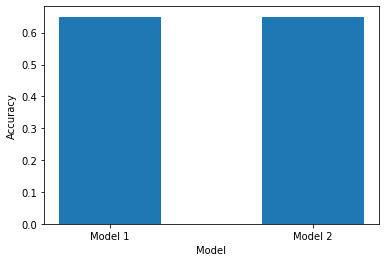

In [19]:
import matplotlib.pyplot as plt
Acc = [M1,M2]
All_Model = ['Model 1','Model 2']
x_pos = [i for i, _ in enumerate(All_Model)]
plt.xticks(x_pos, All_Model)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(x_pos,Acc,width = 0.5)
plt.show()